# SMAI Assignment - 2

## Question - `2` : Face Recognition using Principal Component Analysis

| | |
|- | -|
| Course | Statistical Methods in AI |
| Release Date | `16.02.2023` |
| Due Date | `24.02.2023` |

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eignvector of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)



### Tasks
1. Load dataset and divide the date into training and test sets. 
2. Implement the PCA algorithm from scratch.
3. Implement image reconstruction using the eigen projections and visualise differences for different number of components.
4. Visualise the mean(Eigen face) generated.
5. Given training set, obtain accuracy by attempting a face regonition module and obtaining the accuracy for different number of principal components.


#### Import Libraries

In [74]:

import cv2
import zipfile
import numpy as np
import os
import matplotlib.pyplot as plt


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [75]:
def loadData():
    dirpath = './ATnT'
    image_dic = {}
    for subdir, dirs, files in os.walk(dirpath):
        for file in files:
            filename = os.path.join(subdir, file)
            if filename.endswith(".pgm"):
                frame = cv2.imread(filename, 0)       
                if frame is not None:
                    image_dic[filename] = frame
    return image_dic

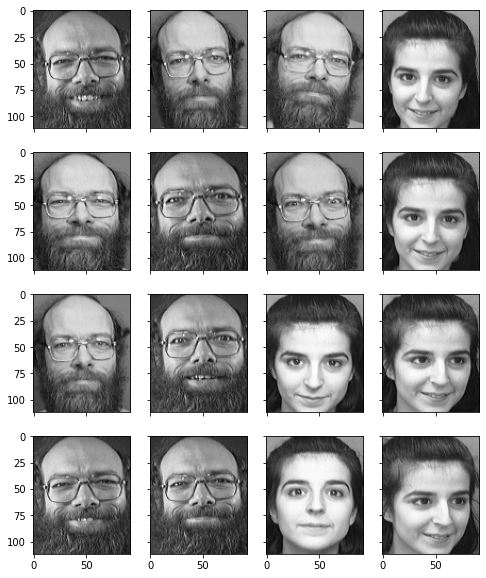

In [76]:
image_dic = loadData()
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(image_dic.values())[230:] 
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
plt.show()

In [77]:
def split_data(image_dic):
    train_img = []
    train_label = []
    test_img = []
    test_label = []
    for key,val in image_dic.items():
        if (key.endswith("5.pgm") or key.endswith("6.pgm")):
            test_img.append(val.flatten())
            test_label.append(key.split("/")[3])
        else:
            train_img.append(val.flatten())
            train_label.append(key.split("/")[3])
    train_img = np.array(train_img)
    test_img = np.array(test_img)
    return train_img, train_label, test_img, test_label

In [78]:
train_img,train_label,test_img,test_label = split_data(image_dic)
print(train_img.shape)
print(test_img.shape)

(320, 10304)
(80, 10304)


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [79]:
# def compute_egval_egvec(X):

#     x_new = []
#     for i in X:
#         x_new.append(i.flatten())
#     x_new = np.array(x_new)
#     mean = np.mean(x_new, axis=0)
#     x_new = x_new - mean
#     cov = np.cov(x_new.T)
#     eigval, eigvec = np.linalg.eig(cov)
#     return x_new,eigval, eigvec
    

In [80]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def pca_fun(X, number_of_compoonents):

    mean = np.mean(X, axis=0)
    X = X - mean
    _, _, Vt = np.linalg.svd(X, full_matrices=False)
    pc = Vt[:number_of_compoonents, :]
    # Normalise the principal components
    pc /= np.linalg.norm(pc, axis=1)[:, np.newaxis]
    return pc



In [81]:
eign_face = pca_fun(train_img, 50)

In [82]:
# print(pca_components)

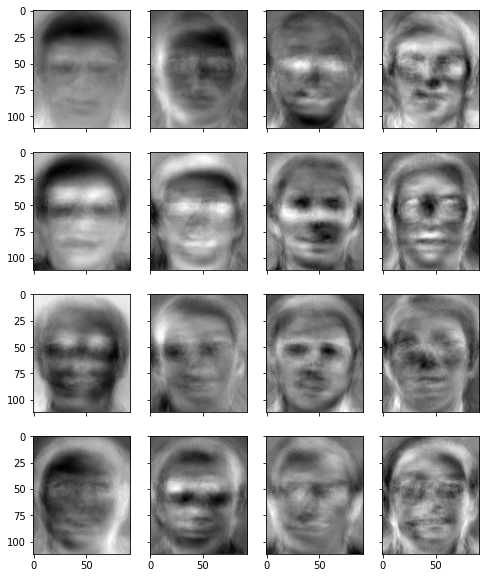

In [83]:
faceshape = list(image_dic.values())[0].shape

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eign_face[i].reshape(faceshape), cmap="gray")
plt.show()

#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [84]:
mean = np.mean(train_img, axis=0)
weights = eign_face @ (train_img - mean).T

In [85]:
# Function to implement image reconstruction by taking arguements as necessary.
def imgreconst(img_count,train_img, comp_count):
  
  eigenfaces = pca_fun(train_img, comp_count)
  _, axes = plt.subplots(img_count,2,sharex=True,sharey=True,figsize=(8,20))
  # Generate the random faces to display.
  # weights = eign_face @ (train_img - mean).T

 



  # random_weights = np.random.randn(n_components) * weights.std()

  for i in range(img_count):

    weights = np.dot(eigenfaces, test_img[i] - mean)
    
    axes[i][0].imshow(test_img[i].reshape(faceshape), cmap="gray")
    axes[i][0].set_title("Input face")

    # Mean added to the normal distribution of trained face.
    # newface = (np.random.randn(comp_count) * weights.std()) @ eigenfaces + mean

    newface = np.dot(weights, eigenfaces) + mean

    axes[i][1].imshow(newface.reshape(faceshape), cmap="gray")
    axes[i][1].set_title("Constructed face")

  plt.show()
  return


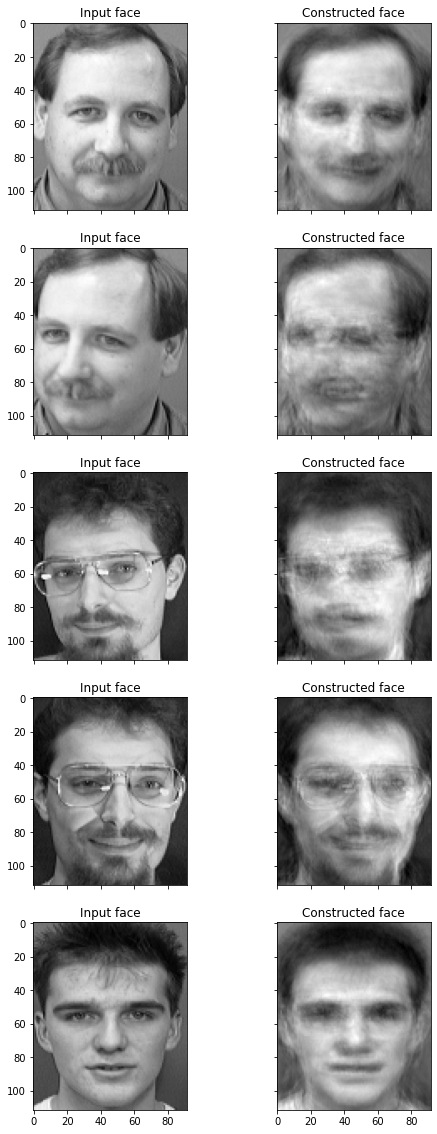

In [86]:
comp_count = 120
imgreconst(5,train_img, comp_count)

##### Procedure
PCA function is called to get the eignfaces.For each image we generate some random weights from the training data, then multiply it with the original_weights and add the mean of the face data. The result is the reconstructed image. We then plot the original image and the reconstructed image side by side. We do this for 5 images.

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

In [87]:
def imgreconst2(img_count,train_img, comp_count):

    # weights = eign_face @ (train_img - mean).T
    eigenfaces = pca_fun(train_img, comp_count)
    eg_val_count = 1
    _, axes = plt.subplots(img_count,2,sharex=True,sharey=True,figsize=(4,4))
    #Generate the random faces and display plot
    eg_val_count += 1
    for i in range(img_count):
        weights = np.dot(eigenfaces, test_img[i] - mean)

        axes[0].set_title("Input Face")
        axes[0].imshow(test_img[i].reshape(faceshape), cmap="gray")
        
        #Get the weights from the normal distributions of the trained images, then we add the mean data to it.
        # newface =  (np.random.randn(comp_count) * weights.std()) @ eigenfaces + mean

        newface = np.dot(weights, eigenfaces) + mean

        axes[1].set_title("Constructed face")
        axes[1].imshow(newface.reshape(faceshape), cmap="gray")
        

    plt.show()



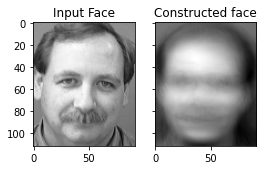

In [88]:
imgreconst2(1, train_img, 5)


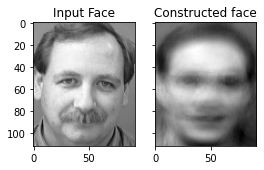

In [89]:
imgreconst2(1, train_img, 10)

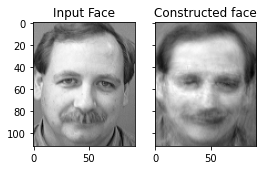

In [90]:
imgreconst2(1, train_img, 100)

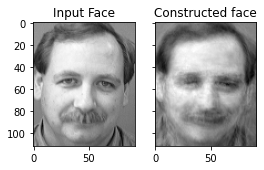

In [91]:
imgreconst2(1, train_img, 200)

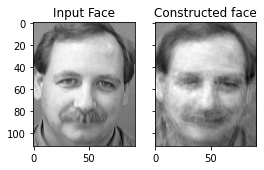

In [92]:
imgreconst2(1, train_img, 300)

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [93]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def pca_helper(test_img_idx, eigenfaces, mean, f_train_img, f_train_op):

  input_img = test_img[test_img_idx].reshape(1,-1)
  input_img_wt = eigenfaces @ (input_img - mean).T
  ip_img_c = 1
  mse = np.mean((weights - input_img_wt)**2, axis=0)
  best_match = np.argmin(mse)
  ip_img_c += 1
  print("Best matched Face ",f_train_op[best_match])
  print("Eucledian Distance ",mse[best_match])

  # Visualize
  fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(4,4))
  axes[0].imshow(input_img.reshape(faceshape), cmap="gray")
  axes[0].set_title("Input face")
  axes[1].imshow(f_train_img[best_match].reshape(faceshape), cmap="gray")
  axes[1].set_title("Best Matched face")
  plt.show()
  return

In [94]:
#For not plotting the image but calculating the MSEs
def mse_cal_helper(test_img_idx, eigenfaces, mean):

    input_img = test_img[test_img_idx].reshape(1,-1)
    input_img_wt = eigenfaces @ (input_img - mean).T
    mse = np.mean((weights - input_img_wt)**2, axis=0)

    return mse[np.argmin(mse)]


In [95]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
msq = []

eign_vec = [5, 10, 50, 100, 200, 300]

for j in eign_vec:

    comp_count = j
    eigenfaces = pca_fun(train_img, comp_count)
    mean = np.mean(train_img, axis=0)
    weights = eigenfaces @ (train_img - mean).T

    error = 0
    for i in range(80):
        error += mse_cal_helper(i, eigenfaces, mean)

    msq.append(error/80)

print(eign_vec)
print(msq)


[5, 10, 50, 100, 200, 300]
[68824.96310434942, 77627.64330930497, 43108.54406334075, 30837.339030939, 20561.100638196487, 15497.404598757892]


Best matched Face  9.pgm
Eucledian Distance  36139.539409511046


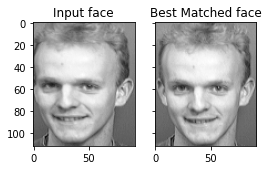

Best matched Face  9.pgm
Eucledian Distance  47528.00216477233


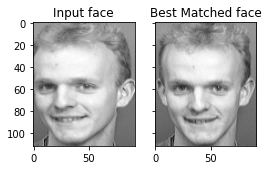

Best matched Face  2.pgm
Eucledian Distance  31865.47117618789


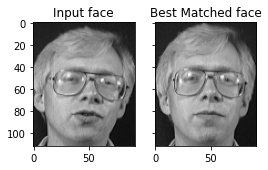

Best matched Face  1.pgm
Eucledian Distance  39729.55240025285


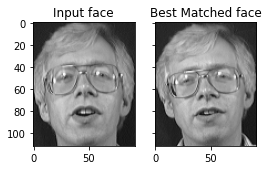

In [96]:
# Plot Number of eigenvectors vs Mean Square Error
comp_count = 100
eigenfaces = pca_fun(train_img, comp_count)
mean = np.mean(train_img, axis=0)
weights = eigenfaces @ (train_img - mean).T

for i in range(10, 14):
    pca_helper(i, eigenfaces, mean, train_img, train_label)

In [97]:
def plot_MSE(eign_vec, msq):
    plt.plot(eign_vec, msq, label='MSE')
    plt.xlabel("Eigen Vectors")
    plt.ylabel("Mean Squared Error")
    plt.legend()
    plt.show()

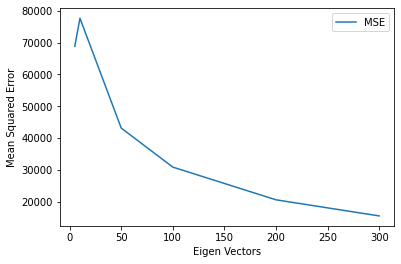

In [98]:
plot_MSE(eign_vec,msq)

In [99]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
def plot_logmsq(eign_vec, msq):
    lmsr = np.log(np.sqrt(msq))
    plt.plot(eign_vec, lmsr, label='Logarithmic MSE')
    plt.xlabel("Eigen Vectors")
    plt.ylabel("Logarithmic Mean Squared Error")
    plt.legend()
    plt.show()

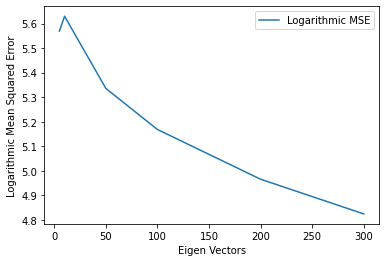

In [100]:
plot_logmsq(eign_vec, msq)

Summarise your observations on the plots and accuracies

**Answer:**

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
Advantages of PCA:
1. Dimensionality reduction :- It reduces the dimensionality of the data set by projecting it onto a lower dimensional subspace while retaining the most information therefore reducing the computational cost.
2. Data visualization :- It can be used to visualize high dimensional data.
3. Noise filtering :- It can be used to remove noise from data.

Limitations of PCA:
1. PCA may not perform well corresponding to the illumination changes as these are the non-linear changes that can not be captured by the linear transformation.
2. Face Recognition is a very complex task and PCA may not be able to capture all the features of the face therefore some information may be lost while projecting the data onto a lower dimensional subspace.